In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer # tokenizar palabras
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding the sentences

In [18]:
# Define input sentences
sentences = [
    'i love my dog !',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>') #maximum number of entries in the dictionary, 
# oov_token indicates putting this value to the unseen words
# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)
# Get the indices ans print it
word_index = tokenizer.word_index
# Recode the sentences with the dictionary created in the previous step
sequences = tokenizer.texts_to_sequences(sentences)
# Padding the sentences to a uniform lenght
padded = pad_sequences(sequences, padding='post')

In [19]:
# printing words
print(word_index)
# priting sequence
print(sequences)
# printing sequence
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [10]:
# testing sequences
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)
print(word_index)
# the word really was losed because it is not in the word index. 
# The same happends with the rest of the words which are not in the word index

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]
{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


## Tokenizing the Sarcams Dataset

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-02-13 14:38:38--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.202.112, 142.251.134.80, 172.217.173.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.202.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5,4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5,38M   475KB/s    in 9,6s    

2023-02-13 14:38:48 (576 KB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [3]:
# opening the files using json
import json

with open('sarcasm.json', 'r') as f:
    dataset = json.load(f)
    

In [4]:
# we have a dictionary with a URL link. 
print(dataset[0])
print(dataset[20000])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}


In [5]:
type(dataset)
# we have a list and we have a dictionary in any element of the list
print(dataset[0])
print(dataset[0]['article_link'])
print(dataset[0]['headline'])
print(dataset[0]['is_sarcastic'])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5
former versace store clerk sues over secret 'black code' for minority shoppers
0


In [6]:
sentences = []
labels = []
urls = []
for element in dataset:
    urls.append(element['article_link'])
    sentences.append(element['headline'])
    labels.append(element['is_sarcastic'])
    

## Preprocessing the headlines
You can convert the sentences list above into padded sequences by using the same methods you've been using in the past exercises. The cell below generates the word_index dictionary and generates the list of padded sequences for each of the 26,709 headlines.



In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-02-13 14:37:45.363445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 14:38:13.489509: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-13 14:38:13.523784: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 14:38:13.523796: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [7]:
# Initialize the Tokenizer Class
tokenizer = Tokenizer(oov_token='<OOV>')

# Generate the word index dictionary
tokenizer.fit_on_texts(sentences)

# Print the lenghtof the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# Print the word index
print(f'Word Index {word_index}')
print()

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

# Print a sample headline
index = 2
print(f'Sample headline: {sequences[index]}')
print(f'Sample padded: {padded[index]}')

# Print dimensions of the padded sequences
print(f'shape of padded sequences: {padded.shape}')

number of words in word_index: 29657
Word Index {'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'wh

This concludes the short demo on using text data preprocessing APIs on a relatively large dataset. Next week, you will start building models that can be trained on these output sequences. See you there!

## Embedding examples

In [2]:
import tensorflow as tf
print(tf.__version__)

2023-02-17 11:12:33.615971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 11:12:33.877044: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 11:12:33.877086: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-17 11:12:35.490740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


In [1]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True) 

2023-02-17 15:33:54.940168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 15:33:55.389407: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 15:33:55.389442: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-17 15:33:56.968404: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Download de dataset

In [2]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [3]:
training_sentences = []
training_lables = []

test_sentences = []
test_lables = []

#training examples

for sentence, label in train_data:
    #hacemos esto porque los valores son tensores
    training_sentences.append(sentence.numpy().decode('utf8')) 
    training_lables.append(label.numpy())
    
# testing examples

for sentence, label in test_data:
    test_sentences.append(sentence.numpy().decode('utf8'))
    test_lables.append(label.numpy())
    

### Split the dataset

In [4]:
import numpy as np
training_lables_final = np.array(training_lables)
testing_lables_final = np.array(test_lables)

## Hyperparameters

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

### Generate Padded Sequences

In [7]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen= max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= max_length)


### Build and compile the model

In [8]:
## defining a neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [10]:
## defining a neural network improved
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [11]:
# compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# printing the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [12]:
#training the model
num_epochs = 10
model.fit(
    padded,
    training_lables_final,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_lables_final)
)

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.5514 - accuracy: 0.7575 - val_loss: 0.3968 - val_accuracy: 0.8324
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3338 - accuracy: 0.8611 - val_loss: 0.3316 - val_accuracy: 0.8576
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2717 - accuracy: 0.8897 - val_loss: 0.3287 - val_accuracy: 0.8582
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2351 - accuracy: 0.9076 - val_loss: 0.3444 - val_accuracy: 0.8530
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2083 - accuracy: 0.9230 - val_loss: 0.3670 - val_accuracy: 0.8478
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1880 - accuracy: 0.9301 - val_loss: 0.3908 - val_accuracy: 0.8424
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1698 - accuracy: 0.9389 - val_loss: 0.4175 - val_accuracy: 0.8387
Epoch 

### Visualize Embeddings

In [27]:
#embedding: it is a kind of words clustering
# Get embedding layer from the model (it is the first layer) 
embedding = model.layers[0]

# Get weights of the embedding layer
embedding_weights = embedding.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(10000, 16)


We need to generate two files:
- `vecs.tsv` - contains the vector weights of each word in the vocabulary
- `meta.tsv` - contains the words in the vocabulary

We use reversed_word_index in order to get the value pairs with the key and the word

In [34]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word # key, value pairs

Now we start the loop to generate the files. You will loop `vocab_size-1` times, skipping the `0` key because it is just for padding

In [39]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` becasue `0` is just for the padding
for word_num in range(1, vocab_size):
    
    # Get the word associated with the current index
    word_name = reverse_word_index[word_num]
    
    # Get the embedding weights associated with the current index
    word_embedding  = embedding_weights[word_num]
    
    # Write the word name 
    out_m.write(word_name + '\n')
    
    # Write the word embedding
    out_v.write('\t'.join([str(x) for x in word_embedding]) + '\n')
    
# Close the files
out_v.close()
out_m.close()


Tensorflow provides us a way to check the [embedding](https://projector.tensorflow.org/) we have to load the files just created

### Building a model with sarcasm dataset

In [43]:
import json 
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
# Vocubulary size of the tokenizer
vocab_size = 10000
# Output dimension of the embedding layer
embedding_dim = 16
# Maximum lenght of tha padded sequences
max_length = 32
# Number of examples to use for training
training_size = 20000 
# Other parameters
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'   


In [41]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-02-17 17:44:10--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.172.80, 172.217.172.112, 172.217.173.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.172.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5,4M) [application/json]
Saving to: ‘sarcasm.json.2’

sarcasm.json.2      100%[===================>]   5,38M  11,4MB/s    in 0,5s    

2023-02-17 17:44:11 (11,4 MB/s) - ‘sarcasm.json.2’ saved [5643545/5643545]



In [45]:
with open('sarcasm.json') as file:
    datastore = json.load(file)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [1]:
## Building a classifier for the sarcasm dataset
10329+12911+12909+10329

46478

### Subwords tokenization with the IMDB Reviews Dataset
In this lab, you will look at a pre-tokenized dataset that is using subword text encoding. This is an alternative to word-based tokenization which you have been using in the previous labs. You will see how it works and its implications on preparing your data and training your model.



Consists in dividing the word in pieces of words (punctuation included) in orden to get more accurated models

   ### Download IMDB reviews plaint text and tokenized datasets
   From this [link](https://www.tensorflow.org/datasets/catalog/imdb_reviews) 

In [1]:
import tensorflow_datasets as tfds

# Donwload the plain text with default configuration
imdb_plain_text, info_plain_text = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# Donwload subwords encoded pretokenized dataset
imdb_subwords, info_subwords = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)


2023-02-24 13:33:42.772216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 13:34:37.297013: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-24 13:34:37.297077: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-24 13:34:58.647225: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Compare the two datasets

In [2]:
# Print description of features
info_plain_text.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})

In [3]:
# Take 2 training examples and print the text feature
for example in imdb_plain_text['train'].take(2):
    print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

2023-02-24 13:35:18.231077: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


For subwords8k, the dataset is already tokenized so the data type will be integers. Notice that the text features also include an encoder field and has a vocab_size of around 8k, hence the name.


In [4]:
# Print description of features
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [5]:
for example in imdb_subwords['train'].take(2):
    print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

2023-02-24 13:35:18.582050: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


You can get the encoder object included in the download and use it to decode the sequences above. You'll see that you will arrive at the same sentences provided in the plain_text config:

In [6]:
#Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

# Take 2 train examples and decode the text feature
for example in imdb_subwords['train'].take(2):
    print(tokenizer_subwords.decode(example[0]))


This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

2023-02-24 13:35:18.835852: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Subwords Text Encoding

In [7]:
# Get the training datasets
train_data = imdb_plain_text['train']

# Initialize sentences
training_sentences = []

# Loop over all training examples and save to the list
for sentence, _ in train_data:
    training_sentences.append(sentence.numpy().decode('utf8'))


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'

# Inicialize tokenizer class
tokenizer_plain = Tokenizer(num_words = 1000, oov_token = oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer_plain.fit_on_texts(training_sentences)

# Generate training sequences
sequence = tokenizer_plain.texts_to_sequences(training_sentences)

In [9]:
tokenizer_plain.sequences_to_texts(sequence[0:1])

["this was an absolutely terrible movie don't be <OOV> in by <OOV> <OOV> or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not <OOV> this <OOV> ridiculous storyline this movie is an early <OOV> us <OOV> piece the most <OOV> scenes were those when the <OOV> <OOV> were making their <OOV> for <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> and her <OOV> love <OOV> with <OOV> was nothing but a <OOV> emotional <OOV> in a movie that was <OOV> of any real <OOV> i am disappointed that there are movies like this <OOV> <OOV> like <OOV> <OOV> good name i could <OOV> sit through it"]

In [10]:
## it is recommended to use <OOV> 

In [11]:
# total number of words in the word index dictionary
len(tokenizer_plain.word_index)

88583

In [12]:
# Encode the first plaintext using the subword text encoder
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)

# Decode the sequence
original_string = tokenizer_subwords.decode(tokenized_string)
print(original_string)


[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

Subword encoding can even perform well on words that are not commonly found on movie reviews. See first the result when using the plain text tokenizer. As expected, it will show many OOVs:

In [13]:
# Define sample sentence
sample_string = 'Tensorflow from basics to mastery'

# Encode using the plain text tokenizer
tokenized_string = tokenizer_plain.texts_to_sequences([sample_string])
print('Tokenized string is {}'.format(tokenized_string))

# Decode and print the result
original_string = tokenizer_plain.sequences_to_texts(tokenized_string)
print('The original string is {}'.format(original_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string is ['<OOV> from <OOV> to <OOV>']


Then compare to the subwords text encoder:

In [14]:
# Encode using subwords tokenizer
tokenized_string = tokenizer_subwords.encode(sample_string)
print('Tokenized string is: {}'.format(tokenized_string))

# Decode and print the result
original_string = tokenizer_subwords.decode(tokenized_string)
print('The original string is: {}'.format(original_string))



Tokenized string is: [6307, 2327, 2934, 7961, 48, 4249, 4429, 7, 2652, 8050]
The original string is: Tensorflow from basics to mastery


As you may notice, the sentence is correctly decoded. The downside is the token sequence is much longer. Instead of only 5 when using word-encoding, you ended up with 11 tokens instead. The mapping for this sentence is shown below:


In [15]:
for ts in tokenized_string:
    print('{}------------->{}'.format(ts, tokenizer_subwords.decode([ts])))

6307------------->Ten
2327------------->sor
2934------------->flow
7961-------------> 
48------------->from 
4249------------->basi
4429------------->cs 
7------------->to 
2652------------->master
8050------------->y


In [16]:
## Subwords es lo contrario a trabajar con bigramas. Ayuda a tener menos <OOV>

### Training the model
You will now train your model using this pre-tokenized dataset. Since these are already saved as sequences, you can jump straight to making uniform sized arrays for the train and test sets. These are also saved as tf.data.Dataset type so you can use the padded_batch() method to create batches and pad the arrays into a uniform size for training.

In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test split
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'] 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [18]:
## Building the model
import tensorflow as tf

# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 10

# Set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 22s 52ms/step - loss: 0.6787 - accuracy: 0.5801 - val_loss: 0.6306 - val_accuracy: 0.6702
Epoch 2/10
391/391 [==============================] - 17s 43ms/step - loss: 0.5021 - accuracy: 0.8097 - val_loss: 0.4204 - val_accuracy: 0.8444
Epoch 3/10
391/391 [==============================] - 16s 41ms/step - loss: 0.3450 - accuracy: 0.8781 - val_loss: 0.3544 - val_accuracy: 0.8604
Epoch 4/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2817 - accuracy: 0.8994 - val_loss: 0.3191 - val_accuracy: 0.8754
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2476 - accuracy: 0.9130 - val_loss: 0.3098 - val_accuracy: 0.8775
Epoch 6/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2226 - accuracy: 0.9222 - val_loss: 0.3084 - val_accuracy: 0.8778
Epoch 7/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2033 - accuracy: 0.9276 - val_loss: 0.3062 - val_accuracy:

### Visualize the results

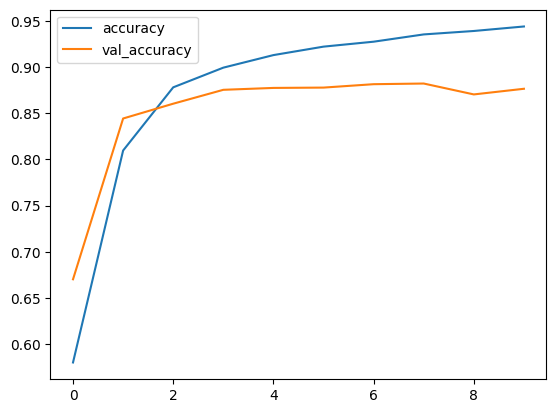

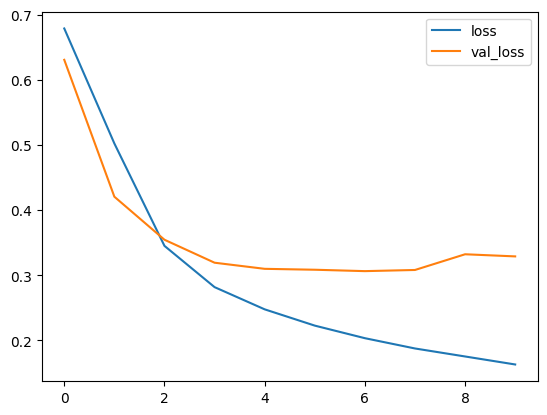

In [30]:
def graph_performance(string):
    import matplotlib.pyplot as plt
    #string = 'accuracy'
    plt.plot(history.history[string], label = string)
    plt.plot(history.history[f'val_{string}'], label = f'val_{string}')
    plt.legend()
    plt.show()
    
graph_performance('accuracy')
graph_performance('loss')


In [ ]:
## Create a new model changing embedding dimensionality
## Building the model
import tensorflow as tf

# Define dimensionality of the embedding
embedding_dim = 128

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Print the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1047680   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,048,461
Trainable params: 1,048,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# changing number of epochs
num_epochs = 15

# Set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/15
391/391 [==============================] - 33s 82ms/step - loss: 0.6758 - accuracy: 0.6062 - val_loss: 0.6156 - val_accuracy: 0.7584
Epoch 2/15
391/391 [==============================] - 34s 87ms/step - loss: 0.4910 - accuracy: 0.8135 - val_loss: 0.4169 - val_accuracy: 0.8386
Epoch 3/15
391/391 [==============================] - 30s 77ms/step - loss: 0.3431 - accuracy: 0.8777 - val_loss: 0.3454 - val_accuracy: 0.8664
Epoch 4/15
391/391 [==============================] - 30s 76ms/step - loss: 0.2808 - accuracy: 0.8998 - val_loss: 0.3262 - val_accuracy: 0.8682
Epoch 5/15
391/391 [==============================] - 30s 77ms/step - loss: 0.2436 - accuracy: 0.9139 - val_loss: 0.3096 - val_accuracy: 0.8792
Epoch 6/15
391/391 [==============================] - 30s 76ms/step - loss: 0.2183 - accuracy: 0.9226 - val_loss: 0.3051 - val_accuracy: 0.8805
Epoch 7/15
391/391 [==============================] - 29s 74ms/step - loss: 0.2008 - accuracy: 0.9285 - val_loss: 0.3095 - val_accuracy:

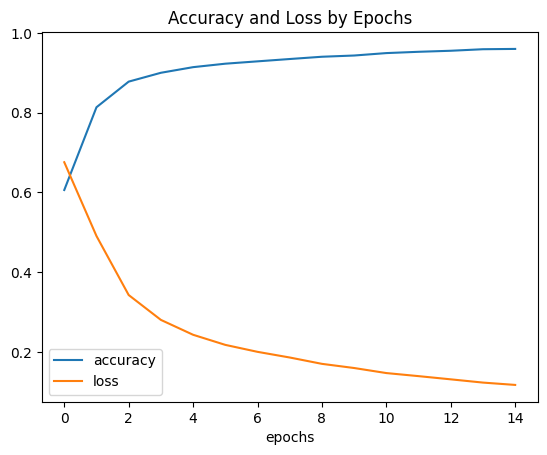

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy and Loss by Epochs')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('epochs')
plt.legend()

plt.show()
    



In [ ]:
## Usar subwords es una tecnica robusta para evitar el out-of-vocabulary token

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.11.0


## Single Layer LSTM (Long Short Term Memory)

### Donwload the dataset

In [33]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder


## Prepare the dataset
You can get the train and test splits and generate padded batches.

Increase the BATCH_SIZE to make the training go faster.

In [37]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test split
train_data, test_data = dataset['train'], dataset['test']

# Shuffle training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum lenght of the sequences
train_dataset = train_dataset.padded_batch(BUFFER_SIZE)
test_dataset = test_dataset.padded_batch(BUFFER_SIZE)


### Build and compile the model
Now you will build the model. You will simply swap the Flatten or GlobalAveragePooling1D from before with an LSTM layer. Moreover, you will nest it inside a Biderectional layer so the passing of the sequence information goes both forwards and backwards. These additional computations will naturally make the training go slower than the models you built last week. You should take this into account when using RNNs in your own applications.



In [39]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy',optimizer='adam', metrics = ['accuracy'])

## Train the model
Now you can start training. Using the default parameters above, you should reach around 98% training accuracy and 82% validation accuracy. You can visualize the results using the same plot utilities. See if you can still improve on this by modifying the hyperparameters or by training with more epochs.


In [46]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs = NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


2023-02-24 13:19:50.196334: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 315520000 exceeds 10% of free system memory.
2023-02-24 13:19:50.545525: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 10096640000 exceeds 10% of free system memory.
2023-02-24 13:19:51.272387: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 213520000 exceeds 10% of free system memory.


: 

: 

In [ ]:
print(history.history['accuracy'])
print()
print(history.history['val_accuracy'])

NameError: name 'history' is not defined

## Multiple Layer LSTM (Long Short Term Memory)

### Download and Prepare the Dataset

In [2]:
import tensorflow_datasets as tfds

help(tfds.load)

Help on function load in module tensorflow_datasets.core.load:

load(name: 'str', *, split: 'Optional[Tree[splits_lib.SplitArg]]' = None, data_dir: 'Union[None, str, os.PathLike]' = None, batch_size: 'Optional[int]' = None, shuffle_files: 'bool' = False, download: 'bool' = True, as_supervised: 'bool' = False, decoders: 'Optional[TreeDict[decode.partial_decode.DecoderArg]]' = None, read_config: 'Optional[read_config_lib.ReadConfig]' = None, with_info: 'bool' = False, builder_kwargs: 'Optional[Dict[str, Any]]' = None, download_and_prepare_kwargs: 'Optional[Dict[str, Any]]' = None, as_dataset_kwargs: 'Optional[Dict[str, Any]]' = None, try_gcs: 'bool' = False)
    Loads the named dataset into a `tf.data.Dataset`.
    
    `tfds.load` is a convenience method that:
    
    1. Fetch the `tfds.core.DatasetBuilder` by name:
    
       ```python
       builder = tfds.builder(name, data_dir=data_dir, **builder_kwargs)
       ```
    
    2. Generate the data (when `download=True`):
    
       

In [4]:
import tensorflow_datasets as tfds

# Donwload the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

2023-02-24 15:39:44.091285: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-24 15:39:44.091544: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-24 15:39:44.091563: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (T0003352549): /proc/driver/nvidia/version does not exist
2023-02-24 15:39:44.092827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Like the previous lab, we increased the BATCH_SIZE here to make the training faster. If you are doing this on your local machine and have a powerful processor, feel free to use the value used in the lecture (i.e. 64) to get the same results as Laurence.

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test split
train_data, test_data = dataset['train'], dataset['test']

# Shuffle training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum lenght of the sequences
train_dataset = train_dataset.padded_batch(BUFFER_SIZE)
test_dataset = test_data.padded_batch(BUFFER_SIZE)


### Build and Compile the Model
You can build multiple layer `LSTM` models by simply appending another LSTM layer in your sequential model and enabling the return_sequences flag to true. This is because an LSTM layer expects a sequence input so if the previous layer is also an LSTM, then it should output a sequence as well. See the code cell bellow that demostrates this flag in action. You will notice that the output dimension is in 3 dimensions (batch_size, timesteps, features) when return_sequence is True

In [16]:
import tensorflow as tf
import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps: {timesteps}')
print(f'features: {features}')
print(f'lstm_dim: {lstm_dim}')

# Define array inputs with random values
random_input = np.random.rand(batch_size, timesteps, features)
print(f'Shape of the input array: {random_input.shape}')

# Define LSTM that returns a single output
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences = False): {result.shape}')

# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences = True): {result.shape}')

batch_size: 1
timesteps: 20
features: 16
lstm_dim: 8
Shape of the input array: (1, 20, 16)
shape of lstm output(return_sequences = False): (1, 8)
shape of lstm output(return_sequences = True): (1, 20, 8)


The next cell implements the stacked LSTM architecture.

In [17]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')    
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [18]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

## Train the Model
The additional LSTM layer will lenghten the training time compared to the previous lab. Run it in Colab with GPU enabled

In [21]:
NUM_EPOCHS = 10

# Train the modelo 
history = model.fit(train_dataset, epochs= NUM_EPOCHS, validation_data= test_dataset)

Epoch 1/10


2023-02-24 18:09:10.143583: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 6494720000 exceeds 10% of free system memory.
2023-02-24 18:09:11.972327: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 6494720000 exceeds 10% of free system memory.
2023-02-24 18:09:11.987773: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 6494720000 exceeds 10% of free system memory.


: 

: 

Correrlo en Google Colab

## Using Convolutional Neural Network
Convolutions extract features by applying filters to the input 

### Download an prepare the dataset

In [1]:
# Download an prepare the dataset
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get tokenizer
tokenizer = info.features['text'].encoder


2023-03-03 11:37:10.220078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 11:37:58.039283: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-03 11:37:58.039327: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-03 11:38:16.725209: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test split
train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum lenght of sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE) 


### Build the model
In images we use 2D convolutional layers en text sequences we use Conv1D. We also append a pooling layer to reduce the output of the convolution layer. You will use GlobalMaxPooling1D to get the max value across the dimension.

In [12]:
 import tensorflow as tf
 import numpy as np
 
 # Hyperparameters
 batch_size = 1
 timesteps = 20
 features = 20
 filters = 128
 kernel_size = 5
 
 print(f'batch size : {batch_size}')
 print(f'timesteps (sequence lenght): {timesteps}')
 print(f'features (embedding size): {features} ')
 print(f'filters: {filters}')
 print(f'kernel size: {kernel_size}')
 
 # Define array input with random values
 random_input = np.random.rand(batch_size, timesteps, features)
 print(f'Shape of input array {random_input.shape}')
 
 # Pass array to convolution layer and inspect output shape
 convld = tf.keras.layers.Conv1D(filters = filters, kernel_size = kernel_size, activation = 'relu')
 result = convld(random_input)
 print(f'Shape the conv1D output: {result.shape}')
 
 # Pass array to max pooling layer and inspect output shape
 gmp = tf.keras.layers.GlobalMaxPool1D()
 result = gmp(result)
 print(f'shape of global max pooling output: {result.shape}')
 

batch size : 1
timesteps (sequence lenght): 20
features (embedding size): 20 
filters: 128
kernel size: 5
Shape of input array (1, 20, 20)
Shape the conv1D output: (1, 16, 128)
shape of global max pooling output: (1, 128)


You can build the model by simply appending the convolution and pooling layer after the embedding layer as show below.

In [14]:
import tensorflow as tf

# Hyperparameter
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [15]:
# Set training parameters
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
NUM_EPOCHS = 10

# Training the model

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


2023-03-03 14:29:40.449176: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 230817792 exceeds 10% of free system memory.
2023-03-03 14:29:40.817056: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 230817792 exceeds 10% of free system memory.


 1/98 [..............................] - ETA: 5:22 - loss: 0.6945 - accuracy: 0.4805

2023-03-03 14:29:41.934325: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 206962688 exceeds 10% of free system memory.
2023-03-03 14:29:42.211367: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 206962688 exceeds 10% of free system memory.


 2/98 [..............................] - ETA: 2:06 - loss: 0.6938 - accuracy: 0.4824

2023-03-03 14:29:43.212708: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 214958080 exceeds 10% of free system memory.


 9/98 [=>............................] - ETA: 1:52 - loss: 0.6931 - accuracy: 0.4983

KeyboardInterrupt: 

### Correrlo en google colab activando GPUs